# Data Project

## Sources
Seattle Traffic Collisions Dataset
This dataset maintained by the city of seattle contains traffic collision report details from 2004 to present. This will be my main datasource for collision data. https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions https://www.kaggle.com/jonleon/seattle-sdot-collisions-data/data https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

There are other supporting datasets:
- Seattle street data: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Seattle_Streets_OD.pdf
- Seattle street sign: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Street_Signs_OD.pdf
- Seattle historical weather data: https://www.meteoblue.com/en/weather/archive/export/seattle_united-states-of-america_5809844

## Key Points
- Some locations had more accidents and are more dangerous.
- There are important features that tend to cause more fetal accidents: time, type of collisions, weather, and speed.
- A lot to explore!

In [20]:
# Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import pdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pygeos

In [21]:
str_shp = gpd.read_file("/Users/ou/Projects/Others/data-incubator/Streets/Seattle_Streets.shp")

In [22]:
# print(str_shp.head(5).to_string())
# str_shp.head(5)
str_shp.columns

Index(['OBJECTID', 'ARTCLASS', 'COMPKEY', 'UNITID', 'UNITID2', 'UNITIDSORT',
       'UNITDESC', 'STNAME_ORD', 'XSTRLO', 'XSTRHI', 'ARTDESCRIP', 'OWNER',
       'STATUS', 'BLOCKNBR', 'SPEEDLIMIT', 'SEGDIR', 'ONEWAY', 'ONEWAYDIR',
       'FLOW', 'SEGLENGTH', 'SURFACEWID', 'SURFACETYP', 'SURFACET_1', 'INTRLO',
       'DIRLO', 'INTKEYLO', 'INTRHI', 'DIRHI', 'NATIONHWYS', 'STREETTYPE',
       'PVMTCONDIN', 'PVMTCOND_1', 'TRANCLASS', 'TRANDESCRI', 'SLOPE_PCT',
       'PVMTCATEGO', 'PARKBOULEV', 'SHAPE_Leng', 'geometry'],
      dtype='object')

In [23]:
X_org = pd.read_csv("/Users/ou/Projects/Others/data-incubator/Collisions.csv")

In [25]:
X_org.shape

(220436, 40)

In [31]:
X_org_1 = X_org.loc[0:120000, ]

In [32]:
X_org_2 = X_org.loc[120001:, ]

In [33]:
X_org_1.shape

(120001, 40)

In [34]:
X_org_2.shape

(100435, 40)

In [38]:
X_org_1.to_csv("/Users/ou/Projects/Others/dash-seattle-collisions/assets/Collisions_1.csv")

In [39]:
X_org_1.to_csv("/Users/ou/Projects/Others/dash-seattle-collisions/assets/Collisions_2.csv")

In [10]:
# In the dataset, we have accidents informaiton on injury and the location
X_org.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [40]:
X_org.INCDTTM = pd.to_datetime(X_org.INCDTTM)

In [42]:
test = X_org[X_org['INCDTTM'].dt.year == 2014]
test.to_csv("/Users/ou/Projects/Others/dash-seattle-collisions/assets/Collisions_1.csv")

In [44]:
X_org['INCDTTM'].dt.year.value_counts()

2005    16016
2006    15794
2004    15457
2007    15082
2015    14260
2008    14139
2016    13955
2009    13275
2014    13212
2013    12757
2012    12732
2017    12477
2011    12416
2018    12198
2010    11958
2019    11203
2020     3504
2003        1
Name: INCDTTM, dtype: int64

In [60]:
test = X_org[X_org['INCDTTM'].dt.year.isin([2019, 2020])]
test.to_csv("/Users/ou/Projects/Others/dash-seattle-collisions/assets/Collisions_1.csv")

In [64]:
test[['X', 'Y', 'REPORTNO']].groupby(['X', 'Y']).count().reset_index().sort_values(by='REPORTNO', ascending=False)

,X,Y,REPORTNO
3296,-122.334695,47.539893,34
2069,-122.351134,47.570942,28
3951,-122.328079,47.604161,23
3300,-122.334666,47.609685,22
3832,-122.329081,47.690342,20
3440,-122.333822,47.545285,19
2467,-122.344997,47.725036,18
2481,-122.344896,47.717173,18
2297,-122.347294,47.647172,17
6374,-122.299160,47.579673,16


In [59]:
X_org[(X_org['INCDTTM'].dt.year.isin([2020])) & (X_org['INCDTTM'].dt.month.isin([7]))]['INCDTTM'].dt.day.value_counts()

2     15
1     12
3      7
5      3
4      3
7      2
14     1
13     1
12     1
10     1
8      1
6      1
Name: INCDTTM, dtype: int64

In [49]:
11203.000000 * 0.374185 + 11203.000000 * 0.015799

4368.990752000001

In [50]:
11203. * 0.002321

26.002163000000003

In [43]:
test.to_csv("/Users/ou/Projects/Others/dash-seattle-collisions/assets/Collisions_test.csv")

In [15]:
X_org['REPORTNO'].value_counts()

1782439     2
1780512     2
1776526     2
C799400     1
2804611     1
2619492     1
3333554     1
3786906     1
1200039     1
E909180     1
3197705     1
3507412     1
E535791     1
3287920     1
1773877     1
E919894     1
3571528     1
2617614     1
3503296     1
3342099     1
3805709     1
3735930     1
C648775     1
3325700     1
04257050    1
E615475     1
2026324     1
E923893     1
3566131     1
3274142     1
           ..
3606163     1
1473237     1
3738648     1
3608972     1
2897328     1
3734504     1
3702726     1
C700013     1
3641083     1
E769135     1
09279043    1
3589926     1
3558837     1
E575817     1
09305028    1
2043762     1
3466815     1
1482591     1
2028292     1
3705852     1
3565764     1
3565456     1
3276857     1
3286710     1
3692694     1
2895847     1
3693238     1
2619209     1
2795751     1
0119831     1
Name: REPORTNO, Length: 220433, dtype: int64

In [19]:
#test = X_org[['X', 'Y', 'REPORTNO']].groupby(['X', 'Y']).count().reset_index()
#test.sort(REPORTNO)
test.sort_values(by='REPORTNO', ascending=False)

,X,Y,REPORTNO
11752,-122.332653,47.708655,295
9237,-122.344896,47.717173,280
12765,-122.328079,47.604161,272
9208,-122.344997,47.725036,269
19743,-122.299160,47.579673,255
8020,-122.351134,47.570942,225
8767,-122.347294,47.647172,217
11796,-122.332451,47.607266,173
9086,-122.345863,47.612991,170
24145,-122.269988,47.522816,164


In [8]:
# A lot of accidents happened in a block than in a intersection
X_org.ADDRTYPE.value_counts()

Block           144344
Intersection     71516
Alley              869
Name: ADDRTYPE, dtype: int64

In [10]:
# Some locations have accidents repeatedly
X_org.LOCATION.value_counts().head()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          295
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    280
6TH AVE AND JAMES ST                                              272
Name: LOCATION, dtype: int64

In [13]:
# 'SEVERITYCODE' indicates the severity: what location prone to accident? what causes a serious accident?
X_org.SEVERITYDESC.value_counts()

Property Damage Only Collision    137026
Injury Collision                   58472
Unknown                            21510
Serious Injury Collision            3082
Fatality Collision                   346
Name: SEVERITYDESC, dtype: int64

In [14]:
# Potential variable to predict severity
X_org.COLLISIONTYPE.value_counts()

Parked Car    48364
Angles        35366
Rear Ended    34545
Other         24450
Sideswipe     18812
Left Turn     14047
Pedestrian     7637
Cycles         5893
Right Turn     2998
Head On        2172
Name: COLLISIONTYPE, dtype: int64

In [17]:
# What reduce the accidents?
X_org.INCDTTM = pd.to_datetime(X_org.INCDTTM)
X_org.INCDTTM.dt.year.value_counts().sort_index()

2003        1
2004    15457
2005    16016
2006    15794
2007    15082
2008    14139
2009    13275
2010    11958
2011    12416
2012    12732
2013    12757
2014    13212
2015    14260
2016    13955
2017    12477
2018    12198
2019    11203
2020     3504
Name: INCDTTM, dtype: int64

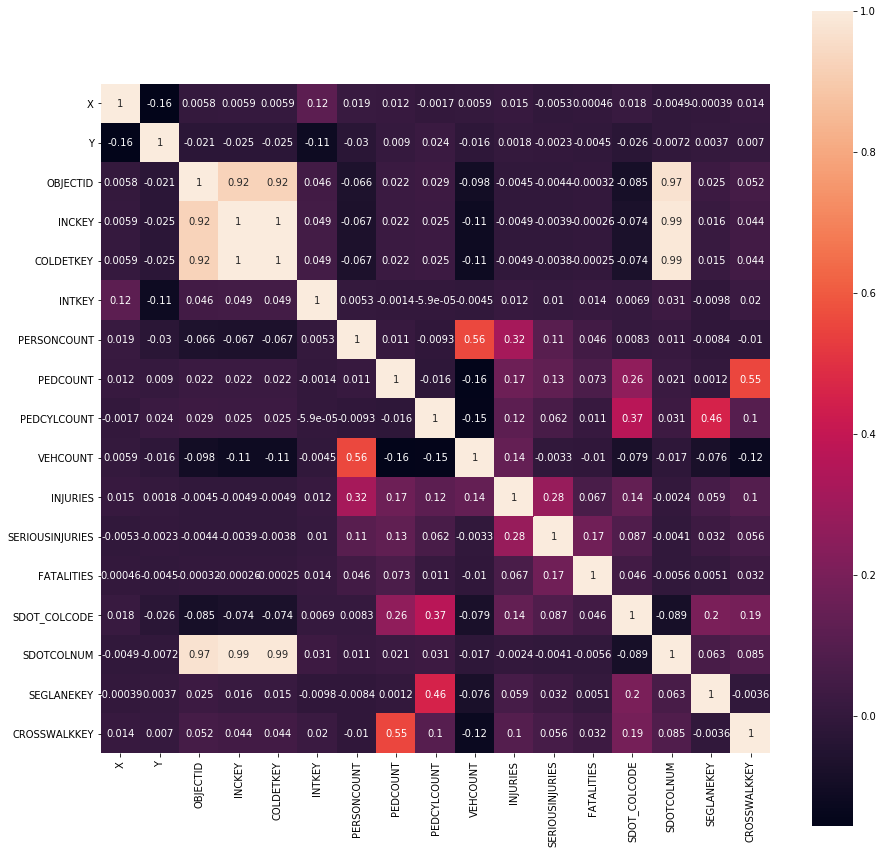

In [33]:
# Correlation 
correlation_mat = X_org.corr()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(correlation_mat, annot=True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [5]:
# Clean up the raw data

def clean(X_org):

    # Drop 'LOCATION'
    # Drop 'REPORTNO', 'STATUS', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'ST_COLCODE' -- ID or repeated column
    # Drop 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'SEVERITYDESC, 'SDOT_COLDESC' -- variables with strong correlation but too obvious
    # Convert INCDATE, INCDTTM (the same, thus only keep one)
    X_org = X_org.loc[~(X_org['SEVERITYCODE'].isna())].copy().reset_index()
    X_org = X_org.loc[~(X_org['SEVERITYDESC']=="Unknown")].copy().reset_index()

    count = X_org[~(X_org['X'].isna())].groupby(['X','Y']).size().reset_index()
    count = count.rename({0: 'count'}, axis='columns').copy()
    X_org = pd.merge(X_org, count, how='left', on=['X', 'Y'])

    # generate new variables
    X_org['dangerous'] = 0
    X_org.loc[X_org['SPEEDING']=="Y", 'dangerous'] = X_org.loc[X_org['SPEEDING']=="Y", 'dangerous'] + 1
    X_org.loc[X_org['INATTENTIONIND']=="Y", 'dangerous'] = X_org.loc[X_org['INATTENTIONIND']=="Y", 'dangerous'] + 1
    X_org.loc[X_org['ST_COLDESC']=="Vehicle going straight hits pedestrian", 'dangerous'] = X_org.loc[X_org['ST_COLDESC']=="Vehicle going straight hits pedestrian", 'dangerous'] + 1
    X_org.loc[X_org['COLLISIONTYPE']=="Pedestrian", 'dangerous'] = X_org.loc[X_org['COLLISIONTYPE']=="Pedestrian", 'dangerous'] + 1

    X_org['safe'] = 0
    X_org.loc[X_org['ST_COLDESC']=="One parked--one moving", 'safe'] = X_org.loc[X_org['ST_COLDESC']=="One parked--one moving", 'safe'] + 1
    X_org.loc[X_org['COLLISIONTYPE']=="Parked Car", 'safe'] = X_org.loc[X_org['COLLISIONTYPE']=="Parked Car", 'safe'] + 1

    # choose features and label
    X = X_org[[
        'SEVERITYDESC', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
        'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
        'FATALITIES', 'INCDTTM', 'JUNCTIONTYPE',
        'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
        'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOT_COLCODE', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
        'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'count'
    ]].copy()
    y = X_org['SEVERITYCODE'].astype('object')

    # deal with time variables
    X.INCDTTM = pd.to_datetime(X.INCDTTM).copy()
    X.loc[:, 'year'] = X.INCDTTM.dt.year
    X.loc[:, 'month'] = X.INCDTTM.dt.month
    X.loc[:, 'hour'] = X.INCDTTM.dt.hour

    # drop variables
    drop = ['INCDTTM', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'SEVERITYDESC',
            'SDOT_COLDESC', 'ST_COLDESC',  # repeated columns with description and code
            'SDOT_COLCODE', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY']
    # ID for accident, lane segment, and crosswalk
    X = X.drop(drop, axis=1).copy()

    # Cleaning
    X.loc[X['UNDERINFL']=="Y", 'UNDERINFL'] = "1"
    X.loc[X['UNDERINFL']=="N", 'UNDERINFL'] = "0"

    X.loc[:, X.select_dtypes(include='object').columns] = X.loc[:, X.select_dtypes(include='object').columns].fillna('MISSING')
    X.loc[:, X.select_dtypes(include=['float64', 'int64']).columns] = X.loc[:, X.select_dtypes(include=['float64', 'int64']).columns].fillna(0)
    # only one observation has SDOT_COLCODE as NaN

    num_col = ["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", 'year', 'month', 'hour',
        'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'count'
    ]
    num_mask = X.columns.isin(num_col)
    cat_col = X.columns[~num_mask].tolist()

    # 'SPEEDING', 'PEDROWNOTGRNT', 'INATTENTIONIND' only has Y and MISSING
    binary = ['INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']
    for i in binary:
        X.loc[X[i]=="Y", i] = "1"
        X.loc[X[i]=="N", i] = "0"
        X.loc[X[i]=="MISSING", i] = "2"

    # Fill missing values with 0
    X.loc[:, num_col] = X.loc[:, num_col].apply(lambda x: x.astype(int))
    X.loc[:, cat_col] = X.loc[:, cat_col].apply(lambda x: x.fillna('MISSING'))
    binary_v2 = ['UNDERINFL']
    X.loc[:, binary_v2] = X.loc[:, binary_v2].apply(lambda x: x.astype(object))

    # Create LabelEncoder object: le
    df = X.select_dtypes(include=['float64', 'int64'])
    enc = OneHotEncoder(handle_unknown='ignore')
    for i in X.select_dtypes(include='object'):
        enc_df = pd.DataFrame(enc.fit_transform(X[[i]]).toarray())
        enc_df = enc_df.add_prefix(i)

        # merge with main df on key values
        df = df.join(enc_df)

    drop = ['UNDERINFL2']
    df = df.drop(drop, axis=1).copy()

    return df, X, y

In [6]:
df, X, y = clean(X_org)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [8]:
df.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,count,year,...,ST_COLCODE54,ST_COLCODE55,ST_COLCODE56,ST_COLCODE57,ST_COLCODE58,ST_COLCODE59,ST_COLCODE60,ST_COLCODE61,ST_COLCODE62,ST_COLCODE63
0,2,1,0,1,2,2,2,0,2,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,2,2,2,1,3,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,2,2,2,2,0,37,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,0,2,2,2,2,0,11,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,0,2,2,2,0,26,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_org.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.340472,47.608629,1,18600,18600,1785104,Matched,Intersection,29598.0,PIKE PL AND PIKE ST,...,Dry,Dark - Street Lights On,NaN,4288030.0,NaN,3,Vehicle backing hits pedestrian,0,0,N
1,-122.251788,47.508176,2,328272,329772,EA07021,Unmatched,Block,NaN,S PRENTICE ST BETWEEN 65TH AVE S AND 66TH AVE S,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.328526,47.703180,3,328374,329874,EA09347,Matched,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.320383,47.539432,4,328985,330485,3857045,Matched,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
4,-122.366178,47.669041,5,328852,330352,EA12640,Unmatched,Block,NaN,8TH AVE NW BETWEEN NW MARKET ST AND NW 56TH ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y


In [41]:
# Baseline model: Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

tree_clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")
tree_clf.fit(X_train, y_train.values.ravel())
y_pred = tree_clf.predict(X_test)
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))

[0.76825186 0.45162459 0.06353591 0.        ]
[0.76826889 0.45031985 0.06602871 0.        ]
0.6618834353959114
[0.76826037 0.45097128 0.06475833 0.        ]


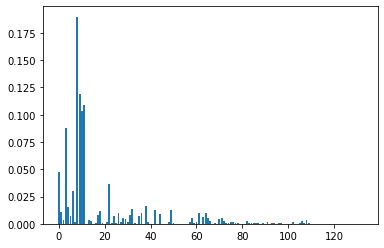

In [49]:
# Look at important features
from matplotlib import pyplot
importance = tree_clf.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [63]:
features = pd.DataFrame(importance, index=X_train.columns)
features.columns = ['value']

In [65]:
# Time, type of collisions, speed, weather are important variables
features.sort_values('value', ascending=False).head(10)

,value
count,0.189868
year,0.119252
hour,0.109150
month,0.103669
VEHCOUNT,0.087406
PERSONCOUNT,0.047384
COLLISIONTYPE6,0.036832
SPEEDING,0.029656
WEATHER1,0.015949
INATTENTIONIND,0.015399
